In [1]:
from pyrosm import get_data, OSM
from pyrosm.data import sources
import os
import pandas as pd

In [2]:
def get_location(location, folder, directory):
    """
    Function to get the location (OSM data) from http://download.geofabrik.de/
    checks whether the location is already downloaded or not, if not downloaded, 
    downloads the location
    
    Parameters
    __________
    location: string variable used to save the name of the location
    folder: folder to use to check if the file is found here
    directory: folder to save the file to when downloading a new file
    
    Returns
    _______
    loc_data: location of the file whether it was downloaded or already in the folder
    """
    
    if location in folder.format(location):
        print('File already in folder')
        #loc_data = OSM('{}-latest.osm.pbf'.format(location))
        loc_data = get_data(location, directory = directory)
        return loc_data
    elif location not in folder.format(location):
        print('Downloading data')
        loc_data = get_data(location, directory = directory)
        #osm_data = OSM(loc_data)
        #return osm_data
        return loc_data

In [3]:
def unique_cols(df):
    """
    Function to check whether the values in a dataframe's columns are unique
    
    Parameters
    __________
    df: dataframe to do operations on
    
    Returns
    _______
    Unique columns
    """
    a = df.to_numpy()
    return (a[0] == a).all(0)

In [4]:
def col_names(df):
    """
    Function that gets the names of the columns in a dataframe and the number of columns
    
    Parameters
    __________
    df: dataframe to use
    
    Returns
    _______
    keys: names of dataframe columns
    len_keys: number of dataframe columns
    """
    
    keys = df.columns
    len_keys = len(keys)
    return keys, len_keys

In [5]:
print('\nThe list of available locations can be found here: http://download.geofabrik.de/ ')
print('Remember to use the specific name for the location, e.g. germany for Germany')

#location = input('Which location would you like to download? ') #Have to use specific name of location
location = 'greater london'
#folder = r'C:\Users\Trym\AppData\Local\Temp\pyrosm\{}-latest.osm.pbf' #Specific folder for saving of files
folder = r'C:\Users\Trym\Documents\Job Related Files\Grasp Labs Case\Maps\{}-latest.osm.pbf'
directory = r'C:\Users\Trym\Documents\Job Related Files\Grasp Labs Case\Maps'

loc_obj = get_location(location, folder, directory)
# Initialize the OSM object 
osm = OSM(loc_obj)

# See the type
print("Type of 'osm' instance: ", type(osm))


The list of available locations can be found here: http://download.geofabrik.de/ 
Remember to use the specific name for the location, e.g. germany for Germany
File already in folder
Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


Exception ignored in: <function BaseGeometry.__del__ at 0x000001BB015E7700>
Traceback (most recent call last):
  File "C:\Users\Trym\anaconda3\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\Trym\anaconda3\lib\site-packages\shapely\geometry\base.py", line 194, in _empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
OSError: exception: access violation reading 0xFFFFFFFFFFFFFFFF


<AxesSubplot:>

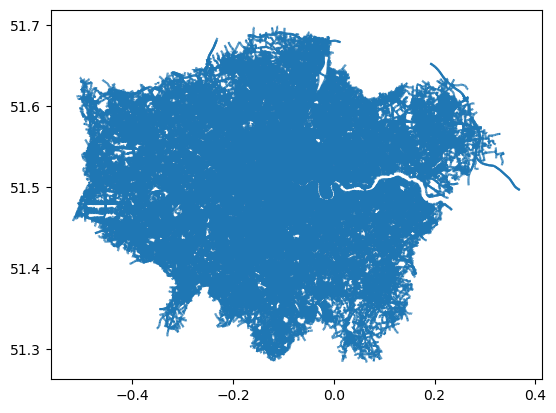

In [6]:
#drive_net = osm.get_network(network_type="driving")
loc_net = osm.get_network(network_type = "all") #location Network
loc_net.plot()

In [7]:
loc_net.head(5)

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,None,None,None,None,None,None,primary,...,None,None,None,74,1548165504,9,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...",18.0
1,None,None,None,None,None,None,None,None,None,primary,...,None,None,None,75,1358874364,10,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...",62.0
2,None,None,None,None,None,None,None,None,None,primary,...,None,None,None,79,1501177066,28,None,way,"MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...",672.0
3,None,None,None,None,None,None,None,None,None,primary,...,None,None,None,482,1584526373,20,None,way,"MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...",294.0
4,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,488,1620301750,13,"{""abutters"":""residential""}",way,"MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...",13.0


In [8]:
print(col_names(loc_net))

(Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'int_ref', 'junction',
       'lanes', 'lit', 'maxspeed', 'motorcar', 'motorroad', 'motor_vehicle',
       'name', 'oneway', 'overtaking', 'path', 'passing_places', 'psv', 'ref',
       'service', 'segregated', 'sidewalk', 'smoothness', 'surface',
       'tracktype', 'tunnel', 'turn', 'width', 'id', 'timestamp', 'version',
       'tags', 'osm_type', 'geometry', 'length'],
      dtype='object'), 41)


In [9]:
print(unique_cols(loc_net))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False]


In [10]:
df = loc_net.drop(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway', 'est_width', 'service', 'oneway',
               'foot', 'footway', 'int_ref', 'junction', 'lanes', 'lit', 'path', 'psv', 'segregated', 'maxspeed',
                'motorcar', 'motorroad', 'motor_vehicle', 'overtaking', 'passing_places', 'sidewalk', 'highway',
                'smoothness', 'surface', 'tracktype', 'tunnel', 'turn', 'width'], inplace = False, axis = 1)
df.head(5)

,name,ref,id,timestamp,version,tags,osm_type,geometry,length
0,Ballards Lane,A598,74,1548165504,9,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...",18.0
1,High Road,A1000,75,1358874364,10,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...",62.0
2,East End Road,A504,79,1501177066,28,None,way,"MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...",672.0
3,Cockfosters Road,A111,482,1584526373,20,None,way,"MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...",294.0
4,Western Way,None,488,1620301750,13,"{""abutters"":""residential""}",way,"MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...",13.0


In [11]:
col_types = df.dtypes
print('The column types are:')
print(col_types)

The column types are:
name           object
ref            object
id              int64
timestamp       int64
version          int8
tags           object
osm_type       object
geometry     geometry
length        float64
dtype: object


In [12]:
df.rename(columns = {'name': 'Address', 
                     'ref': 'reference_id',
                    'id': 'ID'}, inplace = True)
display(df.head())

,Address,reference_id,ID,timestamp,version,tags,osm_type,geometry,length
0,Ballards Lane,A598,74,1548165504,9,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...",18.0
1,High Road,A1000,75,1358874364,10,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...",62.0
2,East End Road,A504,79,1501177066,28,None,way,"MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...",672.0
3,Cockfosters Road,A111,482,1584526373,20,None,way,"MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...",294.0
4,Western Way,None,488,1620301750,13,"{""abutters"":""residential""}",way,"MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...",13.0


In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit = 's')
display(df.head())

,Address,reference_id,ID,timestamp,version,tags,osm_type,geometry,length
0,Ballards Lane,A598,74,2019-01-22 13:58:24,9,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...",18.0
1,High Road,A1000,75,2013-01-22 17:06:04,10,"{""abutters"":""retail""}",way,"MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...",62.0
2,East End Road,A504,79,2017-07-27 17:37:46,28,None,way,"MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...",672.0
3,Cockfosters Road,A111,482,2020-03-18 10:12:53,20,None,way,"MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...",294.0
4,Western Way,None,488,2021-05-06 11:49:10,13,"{""abutters"":""residential""}",way,"MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...",13.0


In [14]:
col_types = df.dtypes
print('The column types are:')
print(col_types)

The column types are:
Address                 object
reference_id            object
ID                       int64
timestamp       datetime64[ns]
version                   int8
tags                    object
osm_type                object
geometry              geometry
length                 float64
dtype: object
